In [3]:
# Pandas/Data readers/ etc 
import pandas as pd
import numpy as np
import pickle

# Visuals 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats Models
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# PMDARIMA
import pmdarima
from pmdarima import auto_arima    # for determining ARIMA orders

# Facebook Prophet 
from fbprophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))

## Facebook Prophet Chiangping

In [49]:
trainChiangping = pd.read_pickle('PKL/TRAIN/trainChangping.pkl')
Chiangping = pd.read_pickle('PKL/TEST/Changping.pkl')

# Resampled 
trainChiangping = trainChiangping.resample('D').mean()
Chiangping = Chiangping.resample('D').mean()

In [50]:
trainChiangping.reset_index(inplace = True)
Chiangping.reset_index(inplace = True)



In [84]:
Chiangping.shape

(281, 2)

In [51]:
trainChiangping.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)
Chiangping.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)

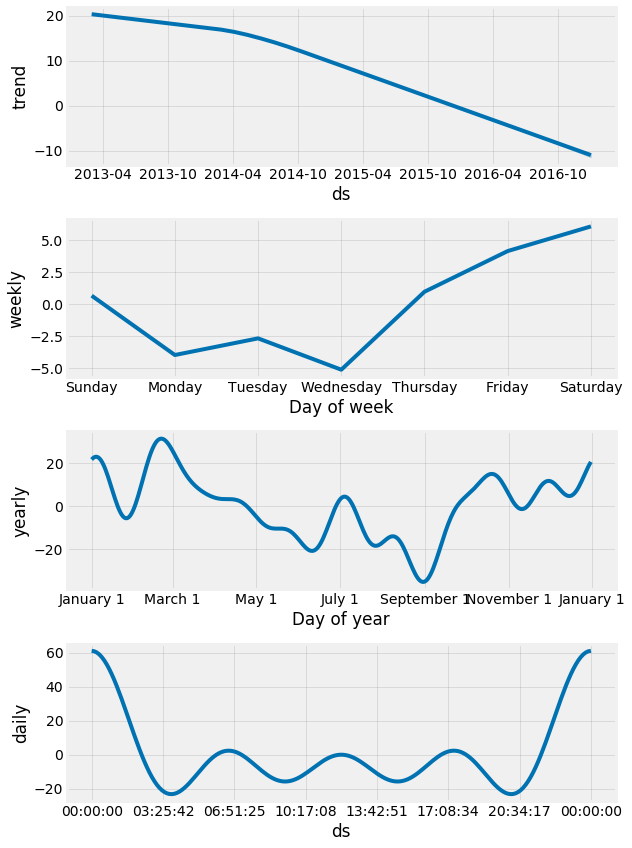

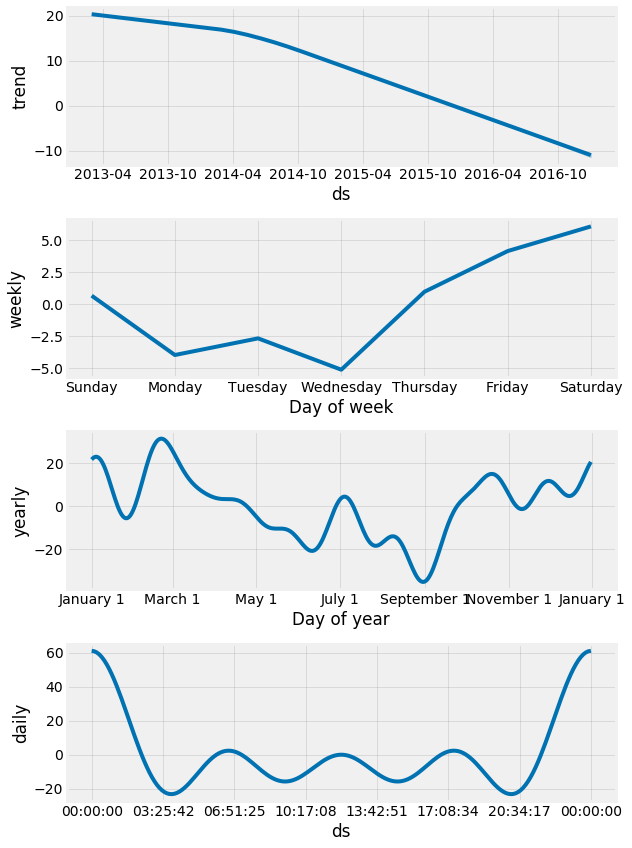

In [106]:
# Attempt at FaceBook Prophet 

fbprophet = Prophet(daily_seasonality = True)
fbprophet.fit(trainChiangping)  

future = fbprophet.make_future_dataframe(periods=281, freq = 'D')

bam = fbprophet.predict(future)
fbprophet.plot_components(bam)


In [107]:
bam.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-01,20.323825,29.222455,186.067484,20.323825,20.323825,90.803469,90.803469,90.803469,60.972068,...,4.144193,4.144193,4.144193,25.687208,25.687208,25.687208,0.0,0.0,0.0,111.127294
1,2013-03-02,20.314460,34.610547,180.511984,20.314460,20.314460,91.573546,91.573546,91.573546,60.972068,...,6.073681,6.073681,6.073681,24.527797,24.527797,24.527797,0.0,0.0,0.0,111.888006
2,2013-03-03,20.305096,29.784343,181.818316,20.305096,20.305096,84.959844,84.959844,84.959844,60.972068,...,0.652286,0.652286,0.652286,23.335490,23.335490,23.335490,0.0,0.0,0.0,105.264940
3,2013-03-04,20.295731,19.003547,176.682346,20.295731,20.295731,79.106630,79.106630,79.106630,60.972068,...,-3.994032,-3.994032,-3.994032,22.128594,22.128594,22.128594,0.0,0.0,0.0,99.402361
4,2013-03-05,20.286366,22.131744,177.708464,20.286366,20.286366,79.204643,79.204643,79.204643,60.972068,...,-2.691051,-2.691051,-2.691051,20.923626,20.923626,20.923626,0.0,0.0,0.0,99.491010


In [108]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Chiangping.y, future)
print(f'Prophet(2,2,0) MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse
error = rmse(Chiangping.y, future)
print(f'Prophet(2,2,0) RMSE Error: {error:18}')

ValueError: Found input variables with inconsistent numbers of samples: [281, 1403]

In [ ]:
Chiangping.shape

In [103]:
future.shape

(1404, 1)

In [ ]:
# Attempt at FaceBook Prophet 

fbprophet = Prophet(daily_seasonality = True)
fbprophet.fit(trainChiangping)  
future = fbprophet.make_future_dataframe(periods=365)
bam = fbprophet.predict(future)
fbprophet.plot_components(bam)

In [75]:
bam.yhat

0       111.127294
1       111.888006
2       105.264940
3        99.402361
4        99.491010
           ...    
1482     49.748223
1483     55.388305
1484     58.135802
1485     59.651824
1486     53.840972
Name: yhat, Length: 1487, dtype: float64

In [96]:
Chiangping.shape

(281, 2)